# Plotting the data

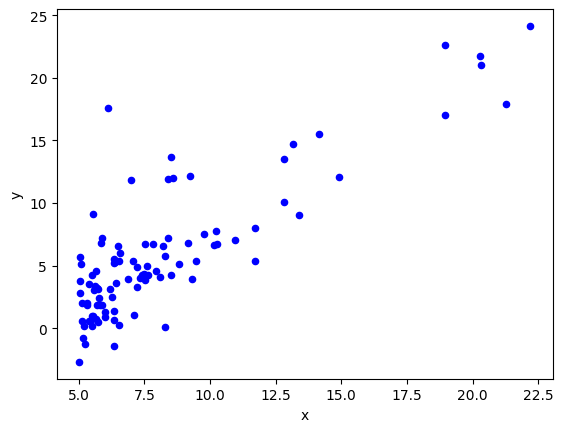

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

# Load the data from the "data2.txt" file
data = pd.read_csv('data2.txt', sep=",", header=None)
data.columns = ["x", "y"]
data.plot(kind='scatter',x='x',y='y',color='blue')
plt.show()
x = data['x'].values
y = data['y'].values

# Normal Equation

In [18]:
# Normal Equation
X_b = np.c_[np.ones((len(x), 1)), x]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([-3.89578088,  1.19303364])

# Plotting batch gradient descent

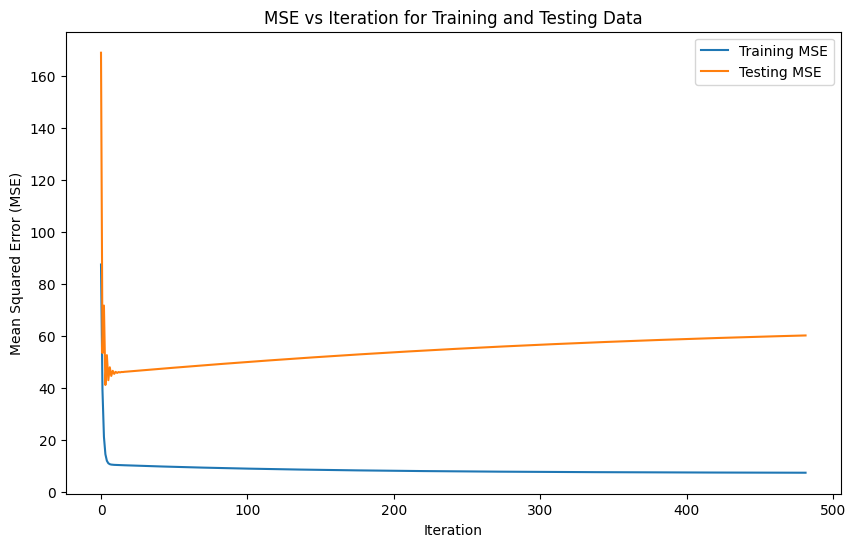

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load data from file
data = np.loadtxt('data2.txt', delimiter=',')

# Split the data into training and testing sets
X, y = data[:, 0], data[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a bias term to X
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]
X_test_b = np.c_[np.ones((len(X_test), 1)), X_test] 
theta = np.random.randn(2)

mse_train = []
mse_test = []

def batch_gradient_descent(X_train_b, y_train, X_test_b, y_test, theta, n_iterations=1000, convergence_threshold=0.0009, learning_rate=0.01):
    m = len(X_train_b)
    for iteration in range(n_iterations):
        gradients = 2/m * X_train_b.T.dot(X_train_b.dot(theta) - y_train)
        theta = theta - learning_rate * gradients

        # Calculate MSE for training data and add to array of training MSEs
        y_pred_train = X_train_b.dot(theta)
        mse_train.append(((y_pred_train - y_train) ** 2).mean())

        y_test = y_test.reshape(-1, 1)

        # Calculate MSE for testing data and add to array of testing MSEs
        y_pred_test = X_test_b.dot(theta)
        mse_test.append(((y_pred_test - y_test) ** 2).mean())

        # Check for convergence
        if iteration > 0 and abs(mse_train[iteration] - mse_train[iteration - 1]) <= convergence_threshold:
            break
    
    return theta, mse_train, mse_test, iteration + 1


new_theta, mse_train, mse_test, convergence_iteration = batch_gradient_descent(X_train_b, y_train, X_test_b, y_test, theta)

# Plot MSE vs Iteration
plt.figure(figsize=(10, 6))
plt.plot(range(len(mse_train)), mse_train, label='Training MSE')
plt.plot(range(len(mse_test)), mse_test, label='Testing MSE')
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.title('MSE vs Iteration for Training and Testing Data')
plt.show()

# Plotting stochastic gradient descent

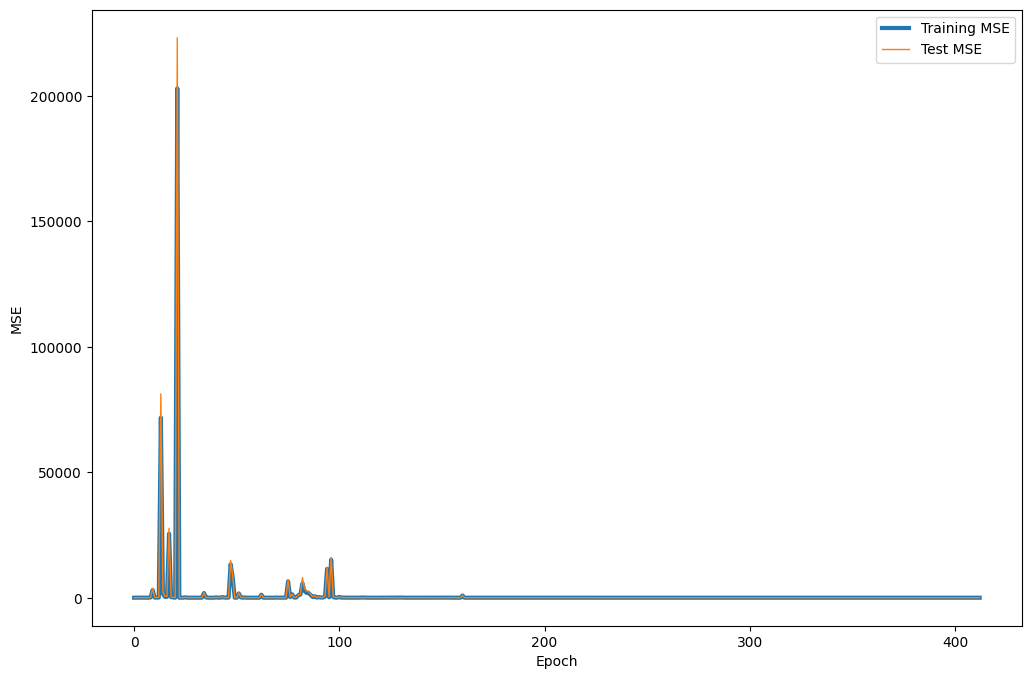

In [20]:
def step_decay(learning_rate, epoch, decay_rate, decay_steps):
    return learning_rate * math.pow(decay_rate, math.floor(epoch / decay_steps))

def stochastic_gradient_descent(X_train_b, y_train, X_test_b, y_test, thetas, n_epochs=1000, initial_learning_rate=0.01, decay_rate=0.5, decay_steps=100, convergence_threshold=1e-4):
    c_hist_train = []  # Cost history list for training data
    c_hist_test = []  # Cost history list for test data

    learning_rate = initial_learning_rate
    for epoch in range(n_epochs):
        for i in range(len(y_train)):
            random_index = np.random.randint(len(y_train))
            xi_train = X_train_b[random_index:random_index+1]
            yi_train = y_train[random_index:random_index+1]
            
            prediction = xi_train.dot(thetas)
            
            gradient = 2 * xi_train.T.dot(prediction - yi_train)
            lr = step_decay(learning_rate, epoch, decay_rate, decay_steps)
            thetas = thetas - lr * gradient
        
        # Calculate Mean Squared Error for training data
        y_pred_train = X_train_b.dot(thetas)
        c_hist_train.append(((y_pred_train - y_train) ** 2).mean())

        # Calculate MSE for testing data
        y_pred_test = X_test_b.dot(thetas)
        c_hist_test.append(((y_pred_test - y_test) ** 2).mean())

        # Check for convergence
        if epoch > 0 and abs(c_hist_train[epoch] - c_hist_train[epoch - 1]) <= convergence_threshold:
            break

    return thetas, c_hist_train, c_hist_test, epoch + 1

theta = np.random.randn(2)

new_theta, training_mse_history, test_mse_history, convergence_value = stochastic_gradient_descent(X_train_b, y_train, X_test_b, y_test, theta)

# Plot the MSE history versus the epoch
plt.figure(figsize=(12, 8))
plt.plot(range(convergence_value), training_mse_history[:convergence_value], label='Training MSE', linewidth=3)
plt.plot(range(convergence_value), test_mse_history[:convergence_value], label='Test MSE', linewidth=1)
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()
plt.show()

# Comparing Accuracy of Test Set and speed of convergence of batch and stochastic gradient descent

In terms of accuracy, stochastic gradient descent proves to be a better choice due to several key observations in my analysis. As depicted in the graph, the alignment between the test mean squared error (MSE) and training MSE indicates minimal overfitting, highlighting the accuracy of the model. Moreover, stochastic gradient descent efficiently reached the global minimum faster than the batch mode. This expected advantage arises from its update strategy, which involves adjusting model parameters after processing each sample, as opposed to batch gradient descent, which computes gradients over the entire training set in each iteration.

It's worth noting that the cost function in stochastic gradient descent exhibited fluctuations, owing to its inherently random nature. To mitigate this behavior, I implemented a step decay learning schedule with a decay rate of 0.3. This stepwise reduction of the learning rate enabled the algorithm to gradually approach the global minimum, enhancing its convergence. In contrast, batch gradient descent started with a high MSE and gradually progressed to achieve a lower MSE.

# Plotting MSE vs Learning Rate

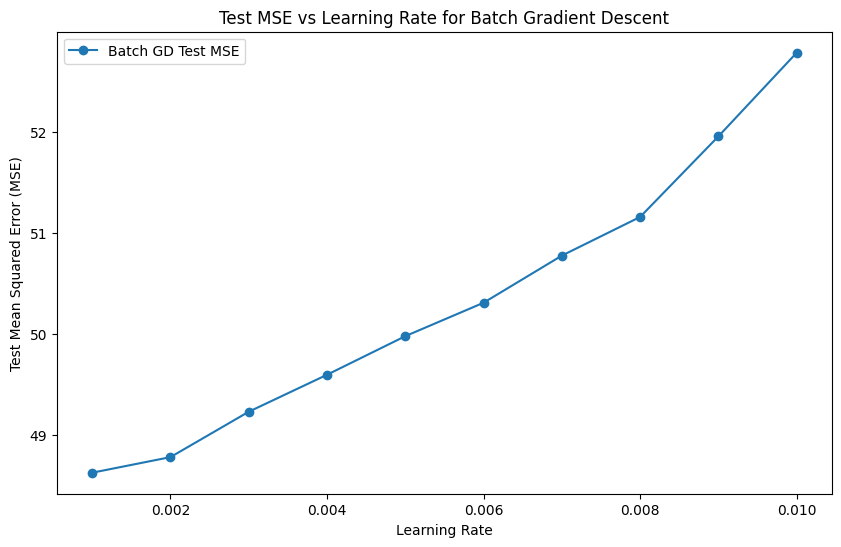

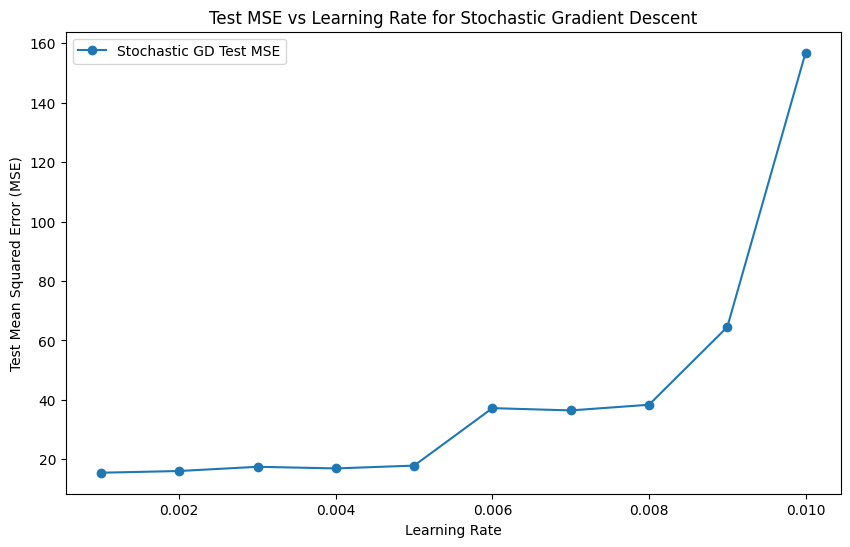

In [21]:
# Define the learning rates
learning_rates = [0.01, 0.009, 0.008, 0.007, 0.006, 0.005, 0.004, 0.003, 0.002, 0.001]

# Initialize lists to store test MSE for each learning rate
test_mse_batch = []
test_mse_stochastic = []

# Loop through the learning rates and perform both types of gradient descent
for learning_rate in learning_rates:
    theta = np.random.randn(2, 1)
    
    _, _, mse_test_batch, _ = batch_gradient_descent(X_train_b, y_train, X_test_b, y_test, theta, learning_rate=learning_rate)
    
    test_mse_batch.append(np.mean(mse_test_batch))
    
    # Stochastic Gradient Descent
    
    theta = np.random.randn(2)
    _, _, mse_test_stochastic, _ = stochastic_gradient_descent(X_train_b, y_train, X_test_b, y_test, theta, initial_learning_rate=learning_rate)
    
    test_mse_stochastic.append(np.mean(mse_test_stochastic))

# Create a graph for Batch Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, test_mse_batch, label='Batch GD Test MSE', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test Mean Squared Error (MSE)')
plt.legend()
plt.title('Test MSE vs Learning Rate for Batch Gradient Descent')
plt.show()

# Create a graph for Stochastic Gradient Descent
plt.figure(figsize=(10, 6))
plt.plot(learning_rates, test_mse_stochastic, label='Stochastic GD Test MSE', marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Test Mean Squared Error (MSE)')
plt.legend()
plt.title('Test MSE vs Learning Rate for Stochastic Gradient Descent')
plt.show()


In my experiments with both stochastic gradient descent and batch gradient descent, I observed that employing a lower learning rate, specifically 0.001, led to reduced test mean squared error. This trend was notably more pronounced in the case of batch gradient descent.

The preference for a learning rate of 0.001 proved to be optimal in both batch and stochastic modes. However, it's essential to delve into the underlying dynamics of these algorithms to understand why a lower learning rate was particularly beneficial in the case of batch gradient descent.

Batch gradient descent updates the model's parameters using the average gradient computed from the entire dataset, whereas stochastic gradient descent processes one data point at a time. The difference in behavior with varying learning rates can be attributed to this distinction.

When the learning rate is set to 0.01, which is relatively high, in the context of batch gradient descent, the algorithm tends to make substantial steps towards the minimum of the loss function. However, this can lead to overshooting the minimum and failure to converge to a global minimum. This overshooting is exacerbated in batch gradient descent because it relies on a more comprehensive but slower update of the model's parameters. The higher learning rate results in larger steps, and when the learning rate is too high, it struggles to make fine adjustments to reach the global minimum.

In contrast, the stochastic gradient descent, which updates the model parameters more frequently, can partially compensate for the higher learning rate's overshooting tendency. It can correct and adjust its path with smaller, more frequent updates. However, even for stochastic gradient descent, a learning rate that is too high can lead to erratic behavior and hinder convergence.

Hence, in our experiments, a learning rate of 0.001 was identified as the most appropriate choice for both batch and stochastic gradient descent. It strikes a balance by allowing the algorithms to make meaningful progress while avoiding overshooting, ultimately resulting in lower test MSE and better convergence.